In [1]:
!pip install pandas plotnine 
from plotnine import * 
import pandas as pd
import numpy as np
from sklearn import linear_model # necessary package for linear regression
import seaborn as sns
import matplotlib.pyplot as plt #for visualization
from sklearn.model_selection import train_test_split #for ml training and tesing split
from sklearn.linear_model import LinearRegression  
from sklearn import tree # package for decision tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('yield_df.csv.zip')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


Removing the first column from the dataset because there is no use of this features.

In [3]:
df=df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [6]:
#summing up all null values
null_data = df.isnull().sum() 
print(null_data) #printing the data
#There is no NA and NULL values in the dataset. It is a clean dataset

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


There is no NA and NULL values in the dataset. It is a clean dataset.

In [7]:
df.rename(columns = {'hg/ha_yield':'yield', 'average_rain_fall_mm_per_year':'avg_rain','pesticides_tonnes':'pesticide', 'Item':'Crop','Area':'Country'}, inplace = True)
print(df.dtypes)

Country       object
Crop          object
Year           int64
yield          int64
avg_rain     float64
pesticide    float64
avg_temp     float64
dtype: object


In above line I have renamed few columns for better usability then printed the datatypes.

Since, my data was already clean, I have still checked for if there is any null value.

Next step involves exploratory data analysis. Firstly, I explored the relationships between all the features (column names) of the dataset, a good way to quickly check correlations among columns by visualizing the correlation matrix as a heatmap.

# Exploratory Data Analysis

Checking the correlation matrix, to know that how columns are corelated.

Text(0.5, 1.0, 'Correlation Heatmap')

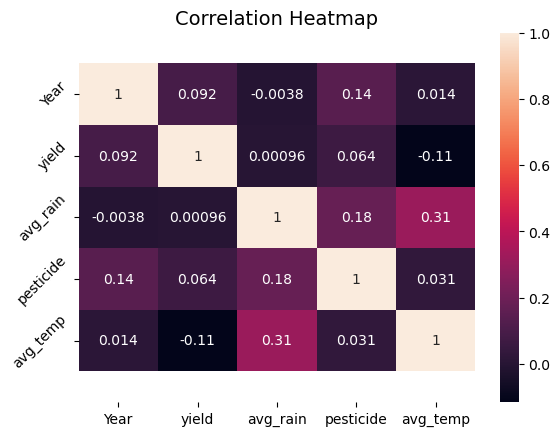

In [8]:
#caculation of correlation
df_corr = df.corr() 

 #plot in a heatmap
ax = sns.heatmap(df_corr, annot=True) 

#limit set up
bottom, top = ax.get_ylim() 

#setting up limit for better visualization
ax.set_ylim(bottom + 0.5, top - 0.5) 

#changing y columns labels direction
ax.set_yticklabels(ax.get_yticklabels(),rotation=45,horizontalalignment='right')

#adding title for the plot
ax.set_title('Correlation Heatmap',fontsize = 14)

In [9]:
df.corr().style.background_gradient()

,Year,yield,avg_rain,pesticide,avg_temp
Year,1.000000,0.091630,-0.003798,0.140930,0.014409
yield,0.091630,1.000000,0.000962,0.064085,-0.114777
avg_rain,-0.003798,0.000962,1.000000,0.180984,0.313040
pesticide,0.140930,0.064085,0.180984,1.000000,0.030946
avg_temp,0.014409,-0.114777,0.313040,0.030946,1.000000


It can be observed from the correlation matrix that there is no significant correlation among the features (column names). Next, I visualized crop-wise total yield. Using this, we can visualize magnitude of yield among different crops.

In [10]:
#Representation of crop as per yield 

#creation of dataframe based on cropwise yield.
df1=df.groupby(['Crop'])['yield'].aggregate('sum').reset_index(name='yield')

#Sorting of values as per order of yield
df_1=df1.sort_values(by=['yield'], ascending=False)

 #printing
print(df_1)

                   Crop      yield
3              Potatoes  854351426
7        Sweet potatoes  344077024
0               Cassava  307730510
1                 Maize  149633801
4           Rice, paddy  137994713
8                 Wheat  116158445
9                  Yams   96676873
2  Plantains and others   58958974
5               Sorghum   56634127
6              Soybeans   53924312


# Plotting Crop-wise Yield Barplot

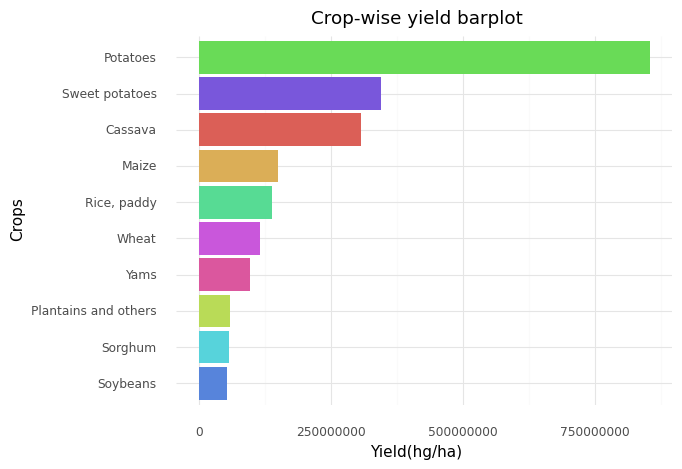

<ggplot: (197333624863)>

In [11]:
#plotting yield and crop using ggplot
p=ggplot(df_1, aes(x='Crop',y='yield',fill='Crop'))+ geom_bar(stat="identity")+theme_minimal()+coord_flip()+ scale_x_discrete(limits=df_1['Crop'].tolist()[::-1]) 

#removing redundant legends
p=p+guides(fill = False, color = False, linetype = False, shape = False) 

#adding up title and labels to thr x and y axis
p+labs(title = "Crop-wise yield barplot",x = "Crops", y = "Yield(hg/ha)")

Text(0.5, 1.0, 'Crop-wise yield boxplot')

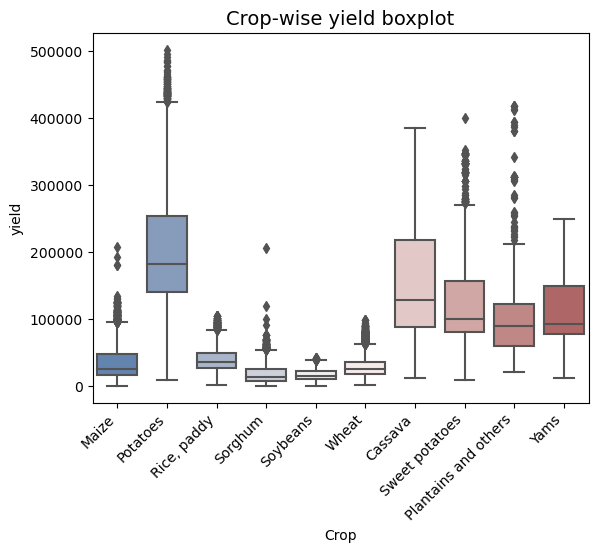

In [12]:
#Box plot, to check the significance of different crops
fig, ax = plt.subplots() 
sns.boxplot(x="Crop",y="yield",palette="vlag",data=df,ax=ax) #box plot of crops
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right') #changing the labels of x axis
ax.set_title('Crop-wise yield boxplot',fontsize = 14)#adding title and frontsize of it

IN Above boxplot i checked outlier so their is much outlier in our dataset.

In [13]:
#Country wise total yield
df_c=df.groupby(['Country'])['yield'].sum().nlargest(10).reset_index(name='Yield')
print(df_c)

          Country      Yield
0           India  327420324
1          Brazil  167550306
2          Mexico  130788528
3           Japan  124470912
4       Australia  109111062
5        Pakistan   73897434
6       Indonesia   69193506
7  United Kingdom   55419990
8          Turkey   52263950
9           Spain   46773540


In [14]:
#df.drop(['Year'], axis=1)


In [15]:
x=df.iloc[:, df.columns != 'yield']
y=df['yield']

# Spliting training and testing data.

In [16]:
#In this phase at first I have created dummy() to change categorical variable country and crops then renamed it.
#In phase 2 I have seperated training and tasting data in 70:30 randomly.
df_dummy = pd.get_dummies(df, columns=['Country','Crop'], prefix = ['Country','Crop']) #creating dummy columns from country and crop and renaming
#print(df_dummy)
cols=df_dummy.loc[:, df_dummy.columns != 'yield'] #not including yield and creating list of rest of the columns 
cols = cols.drop(['Year'], axis=1) #dropping year column from my analysis
column_names = list(cols.columns) #list creation of column names
#print(column_names)


#data creation from the updated columns(excepy yield) for training
X = df_dummy[column_names] 

#data creation using yield column for testing
y = df_dummy['yield'] #data creation using yield column for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1) #spliting training and testing data

# Modeling phase : Linear Regression model was applied to the dataset.

In [17]:
#Modelling Phase:2, application of linear regression model
model = LinearRegression() #calling linear regression function
model.fit(x_train, y_train) #fitting the model
#print(model.coef_)
#print(model.intercept_)
y_pred= model.predict(x_test) #prediction using testing data

In [18]:
# printing actual, predicted values with their difference for linear regression model  
pred_df1=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred}) #taking actual values, predicted values, difference and creating a dataframe
print(pred_df1) #printing

       Actual Value  Predicted Value    Difference
26326         23521     31740.415668  -8219.415668
26971         71988     60700.765410  11287.234590
1599         250797    168942.647442  81854.352558
21555          2244     13016.238406 -10772.238406
3284          19757      7200.198399  12556.801601
...             ...              ...           ...
11695         80716    125488.505177 -44772.505177
11368         23796     26362.605705  -2566.605705
7825          20000    -25468.301824  45468.301824
21181        110000    154421.977516 -44421.977516
10821         83453    126674.698539 -43221.698539

[5649 rows x 3 columns]


#  Application of Decision Tree Model

In [19]:
#Model phase 3: Application of Decision Tree model
clf = tree.DecisionTreeClassifier() #calling decision tree 
clf = clf.fit(x_train, y_train) #fitting the model
y_pred = clf.predict(x_test) #prediction using testing data


In [20]:
# printing actual, predicted values with their difference for Decision Tree model. 
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred}) #taking actual values, predicted values, difference and creating a dataframe
print(pred_df) #printing

       Actual Value  Predicted Value  Difference
26326         23521            28739       -5218
26971         71988            71988           0
1599         250797           250797           0
21555          2244             3435       -1191
3284          19757            19757           0
...             ...              ...         ...
11695         80716            80716           0
11368         23796            23796           0
7825          20000            20000           0
21181        110000            70188       39812
10821         83453            83453           0

[5649 rows x 3 columns]


In [21]:
from sklearn.metrics import classification_report
cls=classification_report(y_test,y_pred)

In [22]:
print(cls)

              precision    recall  f1-score   support

          50       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         0
         111       0.00      0.00      0.00         0
         230       0.00      0.00      0.00         1
         260       0.00      0.00      0.00         1
         383       0.00      0.00      0.00         1
         525       0.00      0.00      0.00         1
         540       0.00      0.00      0.00         0
         578       0.00      0.00      0.00         0
         833       0.00      0.00      0.00         1
         857       0.00      0.00      0.00         0
         973       0.00      0.00      0.00         1
        1111       0.00      0.00      0.00         1
        1219       0.00      0.00      0.00         0
        1269       0.00      0.00      0.00         1
        1317       0.00      0.00      0.00         1
        1320       0.00      0.00      0.00         0
        1389       0.00    